<a id='intro'></a>
# Исследование рынка объектов общественного питания в Москве

## Задание и инструкция по выполнению проекта:

Есть идея открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Инвесторов интересует текущее положение дел на рынке — сможет ли кафе снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?<br>
Партнёры просят подготовить исследование рынка. Есть открытые данные о заведениях общественного питания в Москве.<br>

**ИНСТРУКЦИЯ К ВЫПОЛНЕНИЮ ПРОЕКТА**<br>
**Шаг №1. Загрузите данные и подготовьте их к анализу**<br>
Загрузите данные о заведениях общественного питания Москвы. Убедитесь, что тип данных в каждой колонке — правильный, а также отсутствуют пропущенные значения и дубликаты. При необходимости обработайте их.<br> 
Путь к файлу: /datasets/rest_data.csv.<br>
**Шаг №2. Анализ данных**<br>
•	Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.<br>
•	Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.<br>
•	Для какого вида объекта общественного питания характерно сетевое распространение?<br>
•	Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?<br>
•	Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.<br>
•	Выделите в отдельный столбец информацию об улице из столбца address.<br>
•	Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?<br>
•	Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?<br>
Сделайте общий вывод и дайте рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируйте возможность развития сети.<br>
**Шаг №3. Подготовка презентации**<br>
Подготовьте презентацию исследования для инвесторов. Для создания презентации используйте любой удобный инструмент, но отправить презентацию нужно обязательно в формате pdf. Приложите ссылку на презентацию в markdown-ячейке в формате:<br>
Презентация: <ссылка на облачное хранилище с презентацией> 

**ОПИСАНИЕ ДАННЫХ**<br>
Таблица rest_data:<br>
•	id — идентификатор объекта;<br>
•	object_name — название объекта общественного питания;<br>
•	chain — сетевой ресторан;<br>
•	object_type — тип объекта общественного питания;<br>
•	address — адрес;<br>
•	number — количество посадочных мест.

## Изучение и предобработка данных

[В начало](#intro)

In [1]:
# Импортируем библиотеки Питона:
import pandas as pd #
import os #
import numpy as np #
import math # 
from matplotlib import pyplot as plt #
%matplotlib inline 
import seaborn as sns # 
from numpy import median #
from plotly import graph_objects as go #
from IPython.display import FileLink # библиотека для работы с картинками
import warnings #

# Для подгрузки внешнего файла чтобы сопоставить название улиц районам и округам Москвы
from io import BytesIO
import requests

# Изменяем настройки отображения обработки кода в Пандасе, чтобы предупрежедения не выводились:
warnings.filterwarnings("ignore")

# Изменяем настройки отображения столбцов в Пандасе, чтобы выводились все столбцы:
pd.set_option('display.max_columns', None)

# Изменяем настройки отображения столбцов в Пандасе, чтобы выводились 200 символов в ячейке:
pd.options.display.max_colwidth = 200

Загружаем и оптимизируем данные для анализа. Проверяем, что тип данных в каждой колонке — правильный.

In [2]:
# Читаем файлы с исходными данными и преобразуем их в датафрем Питона:
# указываем путь на локальном компьютере и, как альтернативу, в общедоступной папке в jupiter hub: 
   
path_1 = 'Y:/Обучение цифровой профессии/Аналитик данных/02-04 Как рассказать историю с помощью данных/rest_data.csv'
path_2 = '/datasets/rest_data.csv'

if os.path.exists(path_1):
    rest_data = pd.read_csv(path_1)
elif os.path.exists(path_2):
        rest_data = pd.read_csv(path_2)
else:
    print('Исходные данные для исследования удалены или недоступны.')
          
#     присваиваем имя исходной таблице:
rest_data.name = 'rest_data'
df_names = [rest_data]

In [3]:
# Функция для изучения содержимого датафреймов:
def get_df_info(df_names):
    for i_names in df_names:
        print("Первые и последние 5 строк датафрейма:", i_names.name)
        display(i_names)
        print("-----------------------------------------------------------------------------")
        print("Общая информация о датафрейме:", i_names.name)
        i_names.info()
        print("-----------------------------------------------------------------------------")
        print("Разброс значений, максимум, минимум, среднее и медиана в столбцах датафрейма:", i_names.name)
        display(i_names.describe())
        print("-----------------------------------------------------------------------------")
        print("Количество дубликатов в датафрейме:", i_names.name)
        print(i_names.duplicated().sum())
        print("=============================================================================")

In [4]:
# изучаем содержимое исходного датафрейма:
df_info = get_df_info(df_names)

Первые и последние 5 строк датафрейма: rest_data


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское шоссе, 22-й километр, домовладение 4, строение 1",36


-----------------------------------------------------------------------------
Общая информация о датафрейме: rest_data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB
-----------------------------------------------------------------------------
Разброс значений, максимум, минимум, среднее и медиана в столбцах датафрейма: rest_data


,id,number
count,15366.000000,15366.000000
mean,119720.066901,59.547182
std,73036.130732,74.736833
min,838.000000,0.000000
25%,28524.000000,12.000000
50%,144974.500000,40.000000
75%,184262.250000,80.000000
max,223439.000000,1700.000000


-----------------------------------------------------------------------------
Количество дубликатов в датафрейме: rest_data
0


In [5]:
# Приводим названия заведений к нижнему регистру
rest_data['object_name'] = [x.lower().replace(' ', '_') for x in rest_data['object_name'].values]
#display(rest_data)
#print(list(rest_data['object_name'].unique()))

# Удаляем явные дубликаты ислючив из анализа столбец с id
rest_data_clean = rest_data.copy()
rest_data_clean = rest_data_clean.drop(['id'], axis=1)
#display(rest_data_clean)
print('Количество дубликатов в датафрейме без учета столбца id:', rest_data_clean.duplicated().sum(), 'шт.')
rest_data_clean = rest_data_clean.drop_duplicates()
print('Удалив дубликаты оставляем:', 
      round(((rest_data_clean.shape[0] / rest_data.shape[0])) * 100), 
      '% от исходного количества строк (', rest_data_clean.shape[0], 'шт.).')

Количество дубликатов в датафрейме без учета столбца id: 85 шт.
Удалив дубликаты оставляем: 99 % от исходного количества строк ( 15281 шт.).


Исходный датафрейм представляет собой таблицу, в которой 15365 строк и 6 столбцов.

В столбцах используются значения различных типов: строки и целые числа. Автоматически определенный тип значений верен.
    
На данном этапе пропусков в датафрейме не обнаружено. Количество дубликатов в датафрейме без учета столбца id: 85 шт.
Удалив дубликаты оставляем 99 % от исходного количества строк ( 15281 шт.).

## Шаг №2. Анализ данных

[В начало](#intro)

### Cоотношение видов (типов) объектов общественного питания по их количеству

[В начало](#intro)

In [6]:
# Перечень уникальных видов (типов) объектов общественного питания:
object_type_dist = rest_data_clean['object_type'].nunique()
print('Всего уникальных видов (типов) объектов общественного питания:', object_type_dist, '.')
print('Общее количество объектов общественного питания (100 %):', rest_data_clean.shape[0], '.')
print('Cоотношение видов (типов) объектов общественного питания по их количеству:')
type_unique = (rest_data['object_type']
               .value_counts()
               .reset_index()
              )
type_unique.columns = ['object_type', 'type_count']
type_unique['percent'] = round((type_unique['type_count'] / rest_data_clean.shape[0]) * 100, 2)
display(type_unique)

Всего уникальных видов (типов) объектов общественного питания: 9 .
Общее количество объектов общественного питания (100 %): 15281 .
Cоотношение видов (типов) объектов общественного питания по их количеству:


,object_type,type_count,percent
0,кафе,6099,39.91
1,столовая,2587,16.93
2,ресторан,2285,14.95
3,предприятие быстрого обслуживания,1923,12.58
4,бар,856,5.60
5,буфет,585,3.83
6,кафетерий,398,2.60
7,закусочная,360,2.36
8,магазин (отдел кулинарии),273,1.79


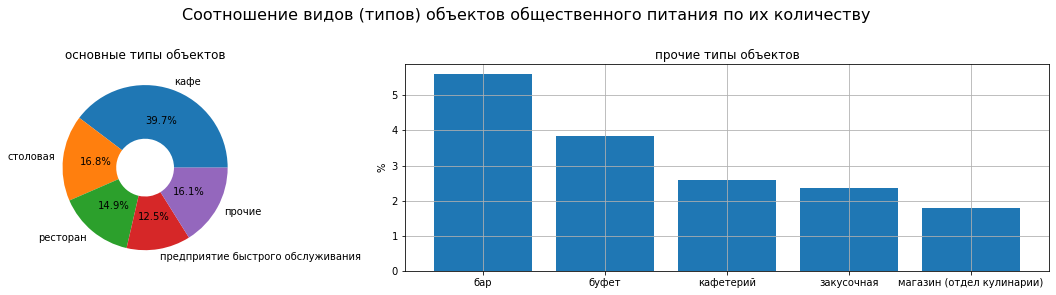

In [7]:
# Строим графики соотношения видов (типов) объектов общественного питания по их количеству:

# готовим датафрейм для круговой диаграммы:
var_first = 4 # первые 4 позиции из соритрованного по убыванию количества заведений списка
var_last = object_type_dist - var_first # остальные позиции из соритрованного списка
type_unique_pie = type_unique.head(var_first)
type_unique_pie = type_unique_pie.drop(['percent'], axis=1)
sum_last = rest_data.shape[0] - sum(type_unique_pie['type_count'])
type_unique_pie.loc[len(type_unique_pie.index)] = ['прочие', sum_last]
#display(type_unique_pie)

# готовим датафрейм для столбчатой диаграммы:
type_unique_bar = type_unique.tail(var_last)
type_unique_bar = type_unique_bar.drop(['type_count'], axis=1)
#display(type_unique_bar)

# строим обе диаграммы на одной фигуре рядом:
fig_1 = plt.figure(figsize=(15, 4))
gridsize = (1, 3) # сетка состоит из 1 строки и 3 столбцов, первая ячейка имеет номер (0, 0), вторая - (0, 1)
axes1 = plt.subplot2grid(gridsize, (0, 0)) # на круговую диаграмму отводим одну ячейку
axes2 = plt.subplot2grid(gridsize, (0, 1), colspan = 2) # на столбчатую диаграмму отводим две ячейки
fig_1.suptitle('Соотношение видов (типов) объектов общественного питания по их количеству', y=1.012, fontsize=16)
# в первой ячейке строим круговую диаграмму:
axes1.set(title = 'основные типы объектов')
axes1.pie(
    x = type_unique_pie['type_count'], 
    labels = type_unique_pie['object_type'], 
    autopct = '%1.1f%%', # выводим значения в процентах
    wedgeprops = dict(width = 0.65) # отверстие в центре круга
)
# во второй ячейке строим столбчатый график:
axes2.set(title='прочие типы объектов')
axes2.bar(x = type_unique_bar['object_type'], height = type_unique_bar['percent'])
axes2.grid('True')
axes2.set_ylabel('%')

plt.tight_layout() # исключаем наложение графиков
plt.savefig('1 Соотношение видов (типов) объектов общественного питания по их количеству.png')
plt.show()


Почти 40 % всех заведений - это кафе.<br>
На втором месте по распространенности столовые (16,8 %), далее следуют рестораны (14,9 %) и предприятия быстрого обслуживания (12,5 %).<br>
Прочие 5 видов заведений вместе набирают чуть более 16 % (среди них больше всего баров - более 5 %).

### Cоотношение сетевых и несетевых заведений по их количеству

[В начало](#intro)

In [8]:
# Перечень уникальных видов (типов) объектов общественного питания:
print('Всего уникальных видов (типов) объектов общественного питания:', object_type_dist, '.')
print('Общее количество объектов общественного питания (100 %):', rest_data_clean.shape[0], '.')
print('Cоотношение сетевых и несетевых заведений по их количеству:')
type_unique_chain = (rest_data_clean['chain']
                     .value_counts()
                     .reset_index()
                    )
type_unique_chain.columns = ['object_chain', 'type_count']
type_unique_chain['percent'] = round((type_unique_chain['type_count'] / rest_data_clean.shape[0]) * 100, 2)
display(type_unique_chain)

Всего уникальных видов (типов) объектов общественного питания: 9 .
Общее количество объектов общественного питания (100 %): 15281 .
Cоотношение сетевых и несетевых заведений по их количеству:


,object_chain,type_count,percent
0,нет,12317,80.6
1,да,2964,19.4


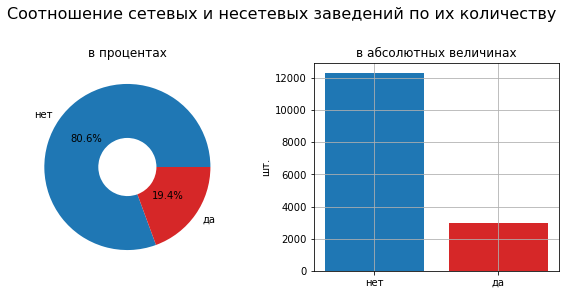

In [9]:
# Строим графики сетевых и несетевых заведений по их количеству:

# готовим датафрейм для диаграмм:
type_unique_chain_pie_bar = type_unique_chain.drop(['percent'], axis=1)
#display(type_unique_chain_pie_bar)

# строим обе диаграммы на одной фигуре рядом:
fig_1 = plt.figure(figsize=(8, 4))
gridsize = (1, 2) # сетка состоит из 1 строки и 2 столбцов, первая ячейка имеет номер (0, 0), вторая - (0, 1)
axes1 = plt.subplot2grid(gridsize, (0, 0)) # на круговую диаграмму отводим одну ячейку
axes2 = plt.subplot2grid(gridsize, (0, 1)) # на столбчатую диаграмму отводим одну ячейку
fig_1.suptitle('Соотношение сетевых и несетевых заведений по их количеству', y=1.012, fontsize=16)
# в первой ячейке строим круговую диаграмму:
axes1.set(title = 'в процентах')
axes1.pie(
    x = type_unique_chain_pie_bar['type_count'], 
    labels = type_unique_chain_pie_bar['object_chain'], 
    autopct = '%1.1f%%', # выводим значения в процентах
    wedgeprops = dict(width = 0.65), # отверстие в центре круга
    colors = ['tab:blue', 'tab:red']
)
# во второй ячейке строим столбчатый график:
axes2.set(title='в абсолютных величинах')
axes2.bar(x = type_unique_chain_pie_bar['object_chain'], 
          height = type_unique_chain_pie_bar['type_count'],
          color = ['tab:blue', 'tab:red']
         )
axes2.grid('True')
axes2.set_ylabel('шт.')

plt.tight_layout() # исключаем наложение графиков
plt.savefig('2 Соотношение сетевых и несетевых заведений по их количеству.png')
plt.show()


Почти 81 % (12317 шт.) всех заведений - не сетевые.<br>
Чуть более 19 % (2964 шт.) - сетевые.

### Сетевое распространение среди объектов общественного питания

[В начало](#intro)

Cоотношение видов (типов) объектов общественного питания по признаку сетевое / не сетевое заведение:


,object_type,type_count,percent,chain_yes,chain_no,percent_chain_yes
0,кафе,6099,39.91,1396,4675,22.89
1,столовая,2587,16.93,3,2581,0.12
2,ресторан,2285,14.95,543,1739,23.76
3,предприятие быстрого обслуживания,1923,12.58,788,1109,40.98
4,бар,856,5.60,37,818,4.32
5,буфет,585,3.83,11,565,1.88
6,кафетерий,398,2.60,52,343,13.07
7,закусочная,360,2.36,56,292,15.56
8,магазин (отдел кулинарии),273,1.79,78,195,28.57


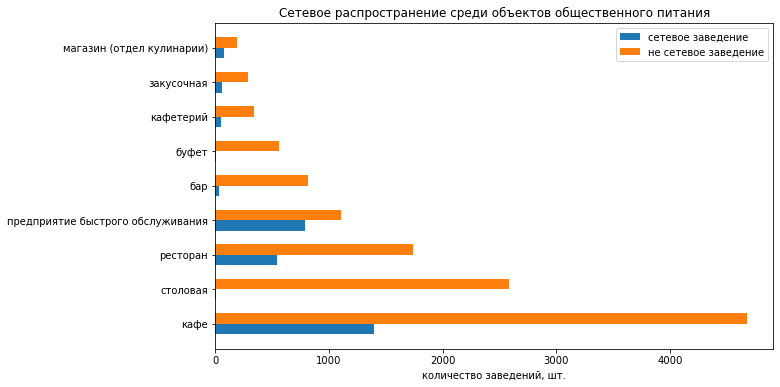

In [10]:
# Готовим датафрейм с обобщенными данными сетевых и несетевых заведений по их типам:
rest_data_clean['chain_yes'] = np.where(rest_data_clean['chain'].str.contains('да'), 1, 0)
rest_data_clean['chain_no'] = np.where(rest_data_clean['chain'].str.contains('нет'), 1, 0)
#display(rest_data_clean)
type_unique_chain_yes = rest_data_clean.groupby('object_type')['chain_yes'].sum().reset_index()
type_unique_chain_no = rest_data_clean.groupby('object_type')['chain_no'].sum().reset_index()
type_unique = type_unique.merge(type_unique_chain_yes, on = ['object_type'], how = 'inner')
type_unique = type_unique.merge(type_unique_chain_no, on = ['object_type'], how = 'inner')
type_unique['percent_chain_yes'] = round((type_unique['chain_yes'] / type_unique['type_count']) * 100, 2)
print('Cоотношение видов (типов) объектов общественного питания по признаку сетевое / не сетевое заведение:')
display(type_unique)               

# Строим столбчатые графики сетевых и несетевых заведений:
width = 0.3
x = np.arange(len(type_unique))
fig, ax = plt.subplots(figsize = (10, 6))
rects1 = ax.barh(x - width/2, type_unique['chain_yes'], width, label = 'сетевое заведение')
rects2 = ax.barh(x + width/2, type_unique['chain_no'], width, label = 'не сетевое заведение')
ax.set_title('Сетевое распространение среди объектов общественного питания')
ax.set_xlabel('количество заведений, шт.')
ax.set_yticks(x)
ax.set_yticklabels(type_unique['object_type'])
ax.legend()
plt.savefig('3 Сетевое распространение среди объектов общественного питания.png')
plt.show()


Среди объектов общественного питания сетевых предприятий в абсолютных величинах больше всего среди кафе (1396 шт.), а в относительных величинах - среди предприятий быстрого обслуживания (40,98 %).<br>
Среди столовых и буфетов сетевых предприятий почти нет.

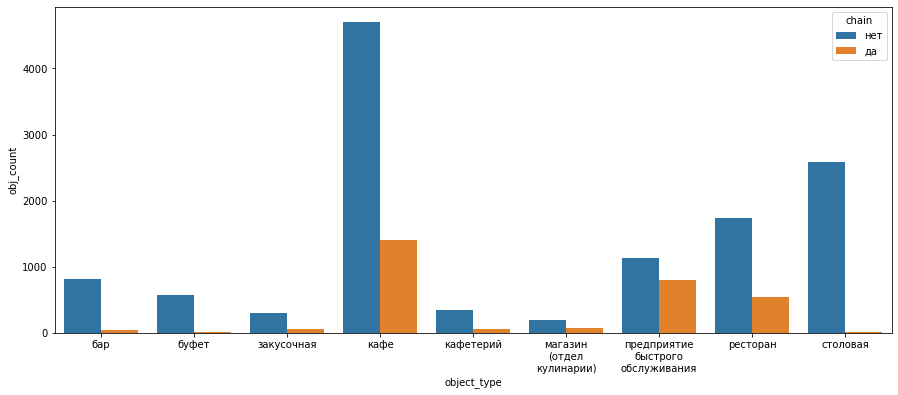

In [11]:
# Код ревьюера

plt.figure(figsize=(15,6))

rest_data.groupby('object_type')['chain'].value_counts() \
    .rename('obj_count') \
    .reset_index() \
    .pipe((sns.barplot,'data'), x='object_type', y='obj_count', hue='chain')

old_ticks, old_labels = plt.xticks()
plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels]);

### Анализ сетевых заведений по количеству посадочных мест

[В начало](#intro)

Проверим, что более характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест.

Устанавливаем диапазоны сравнения:
для посадочных мест (seats):
 мало (s_few) <= [26.]
 много (s_many) >= [67.52]
 среднее количество (s_middle) - в остальных случаях
для количества заведений (counts):
 мало (с_few) <= [3.]
 много (с_many) >= [6.]
 среднее количество (с_middle) - в остальных случаях
Таблица связи количества посадочных мест (s) и количества заведений (c) для сетевых объектов общественного питания:


,col_names,col_sum
0,s_few_c_few,43
1,s_few_c_middle,9
2,s_few_c_many,31
3,s_middle_c_few,35
4,s_middle_c_middle,12
5,s_middle_c_many,32
6,s_many_c_few,44
7,s_many_c_middle,11
8,s_many_c_many,29


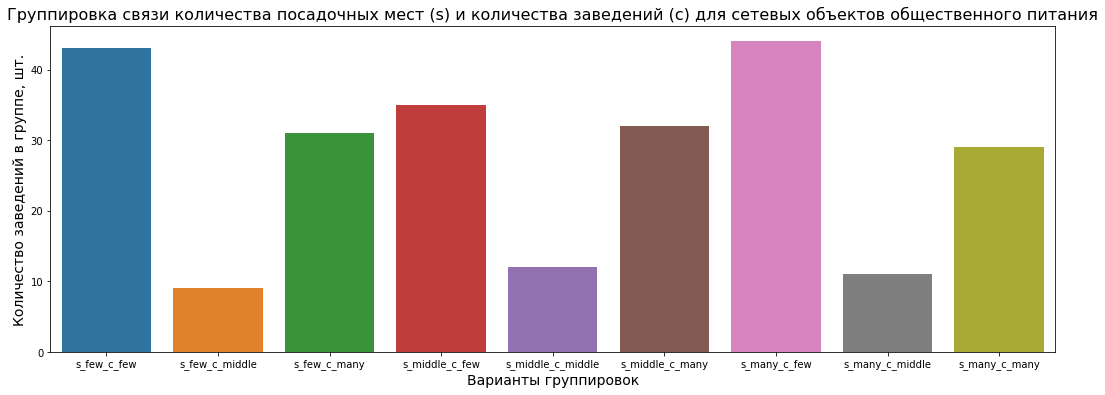

<Figure size 432x288 with 0 Axes>

In [12]:
# Собираем таблицу для построения графика: 

# 1) сгруппируем сетевые заведения по сетям (по object_name) и для каждой сети
#    определим число заведений и среднее число посадочных мест
chain_yes_name_all = rest_data_clean[rest_data_clean['chain_yes'] == 1]
#display(chain_yes_name_all)
chain_yes_name = (chain_yes_name_all
                  .groupby('object_name')
                  .agg({'number' : 'mean', 'chain_yes' : 'sum'})
                  .reset_index())
chain_yes_name.columns = ['object_name', 'number_mean', 'count_chain_yes']
#display(chain_yes_name)

# 2) сети, состоящие из 1 заведения исключаем, т.к. они, вероятно, возникают из-за разного написания названий
chain_yes_name_not_one = chain_yes_name.query('count_chain_yes != 1')
#display(chain_yes_name_not_one)

# 3) для оставшихся сетей формируем группы по критериям много...мало посадочных мест в заведении и количества заведений в сети:
# мало (few), среднее количество (middle), много (many) для мест (seats) и количества заведений (counts).
# Устанавливаем границы с помощью значений 33 и 66 перцентеля:
var_s_33 = np.percentile(chain_yes_name_not_one['number_mean'], [33])
var_s_66 = np.percentile(chain_yes_name_not_one['number_mean'], [66])
var_c_33 = np.percentile(chain_yes_name_not_one['count_chain_yes'], [33])
var_c_66 = np.percentile(chain_yes_name_not_one['count_chain_yes'], [66])
print('Устанавливаем диапазоны сравнения:')
print('для посадочных мест (seats):')
print(' мало (s_few) <=', var_s_33)
print(' много (s_many) >=', var_s_66)
print(' среднее количество (s_middle) - в остальных случаях')
print('для количества заведений (counts):')
print(' мало (с_few) <=', var_c_33)
print(' много (с_many) >=', var_c_66)
print(' среднее количество (с_middle) - в остальных случаях')

# 4) готовим данные
# создадим функцию, которая категоризирует данные столбца number_mean как "s_few / s_middle / s_many":   
def f_number_mean(row):
    x = row['number_mean']
    if x <= var_s_33: return 's_few'
    elif x >= var_s_66: return 's_many'
    else: return 's_middle'

# создадим функцию, которая категоризирует данные столбца count_chain_yes как "c_few / c_middle / c_many":   
def f_count_chain_yes(row):
    x = row['count_chain_yes']    
    if x <= var_c_33: return 'c_few'
    elif x >= var_c_66: return 'c_many'
    else: return 'c_middle'

# cоздадим столбец seats с категориями "s_few / s_middle / s_many":
chain_yes_name_not_one['seats'] = chain_yes_name_not_one.apply(f_number_mean, axis=1)
# cоздадим столбец counts с категориями "c_few / c_middle / c_many":
chain_yes_name_not_one['counts'] = chain_yes_name_not_one.apply(f_count_chain_yes, axis=1)
# создадим переменные для подсчета сумм:
s_few_c_few, s_few_c_middle, s_few_c_many = 0, 0, 0
s_middle_c_few, s_middle_c_middle, s_middle_c_many = 0, 0, 0
s_many_c_few, s_many_c_middle, s_many_c_many = 0, 0, 0
# цикл для подсчета значений переменных:
for i in range(len(chain_yes_name_not_one)):
#chain_yes_name_not_one.iterrows():
#range(len(chain_yes_name_not_one)):
#for i in range(0, len(df)):
#    print df.iloc[i]['c1'], df.iloc[i]['c2']

    if ((chain_yes_name_not_one.iloc[i]['seats'] == 's_few') and (chain_yes_name_not_one.iloc[i]['counts'] == 'c_few')): 
        s_few_c_few = s_few_c_few + 1
    elif ((chain_yes_name_not_one.iloc[i]['seats'] == 's_few') and (chain_yes_name_not_one.iloc[i]['counts'] == 'c_middle')): 
        s_few_c_middle = s_few_c_middle + 1
    elif ((chain_yes_name_not_one.iloc[i]['seats'] == 's_few') and (chain_yes_name_not_one.iloc[i]['counts'] == 'c_many')): 
        s_few_c_many = s_few_c_many + 1    
    elif ((chain_yes_name_not_one.iloc[i]['seats'] == 's_middle') and (chain_yes_name_not_one.iloc[i]['counts'] == 'c_few')): 
        s_middle_c_few = s_middle_c_few + 1
    elif ((chain_yes_name_not_one.iloc[i]['seats'] == 's_middle') and (chain_yes_name_not_one.iloc[i]['counts'] == 'c_middle')): 
        s_middle_c_middle = s_middle_c_middle + 1
    elif ((chain_yes_name_not_one.iloc[i]['seats'] == 's_middle') and (chain_yes_name_not_one.iloc[i]['counts'] == 'c_many')): 
        s_middle_c_many = s_middle_c_many + 1  
    elif ((chain_yes_name_not_one.iloc[i]['seats'] == 's_many') and (chain_yes_name_not_one.iloc[i]['counts'] == 'c_few')): 
        s_many_c_few = s_many_c_few + 1
    elif ((chain_yes_name_not_one.iloc[i]['seats'] == 's_many') and (chain_yes_name_not_one.iloc[i]['counts'] == 'c_middle')): 
        s_many_c_middle = s_many_c_middle + 1
    else: 
        s_many_c_many = s_many_c_many + 1                 
# 5) собираем таблицу с комбинациями категорий seats и counts:
table_combo = pd.DataFrame({
    'col_names' : ['s_few_c_few', 's_few_c_middle', 's_few_c_many', 
                   's_middle_c_few', 's_middle_c_middle', 's_middle_c_many', 
                   's_many_c_few', 's_many_c_middle', 's_many_c_many'],
    'col_sum' : [s_few_c_few, s_few_c_middle, s_few_c_many, 
                 s_middle_c_few, s_middle_c_middle, s_middle_c_many,
                 s_many_c_few, s_many_c_middle, s_many_c_many]
})
print('Таблица связи количества посадочных мест (s) и количества заведений (c) для сетевых объектов общественного питания:')
display(table_combo)
print()
print()

# Строим график
plt.figure(figsize = (18, 6))
barplot_fig = sns.barplot(data = table_combo, x = "col_names", y = "col_sum")
barplot_fig.set_title('Группировка связи количества посадочных мест (s) и количества заведений (c) для сетевых объектов общественного питания', fontsize=16)
barplot_fig.set_ylabel('Количество заведений в группе, шт.', fontsize=14)
barplot_fig.set_xlabel('Варианты группировок', fontsize=14)
plt.show()
plt.savefig('4 Группировка связи количества посадочных мест (s) и количества заведений (c).png')

Для объектов общественного питания сетевых предприятий характерно наличие лишь нескольких сетей с большим количеством заведений как с небольшим (до 26), так и со средним (от 26 до 68) и большим (от 68) числом посадочных мест в каждом.

In [13]:
chain_yes_name_not_one[['seats','counts']].value_counts().to_frame().unstack('counts')

0                
counts   c_few c_many c_middle
seats                         
s_few       43     31        9
s_many      44     29       11
s_middle    35     32       12

### Анализ сетевых заведений по видам объекта общественного питания 

[В начало](#intro)

Для каждого вида объекта общественного питания найдем среднее количество посадочных мест. Определим вид заведения, предоставляющий в среднем самое большое количество посадочных мест.

Таблица для связи вида сетевого заведения и среднего количества посадочных мест в нем:


,object_type,mean_number,count_object
0,столовая,112.0,3
1,ресторан,100.0,543
2,бар,53.0,37
3,кафе,47.0,1396
4,предприятие быстрого обслуживания,40.0,788
5,закусочная,14.0,56
6,буфет,13.0,11
7,кафетерий,12.0,52
8,магазин (отдел кулинарии),9.0,78


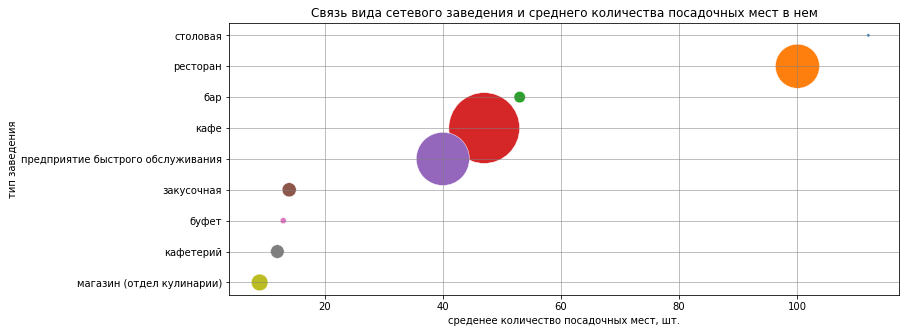

<Figure size 432x288 with 0 Axes>

In [14]:
# Собираем таблицу для построения графика
chain_yes_type = chain_yes_name_all.groupby('object_type')['number'].mean().reset_index()
chain_yes_type.columns = ['object_type', 'mean_number']
chain_yes_type['mean_number'] = round(chain_yes_type['mean_number'])
chain_yes_count = chain_yes_name_all.groupby('object_type')['chain_yes'].sum().reset_index()
chain_yes_count.columns = ['object_type', 'count_object']
chain_yes_type = chain_yes_type.merge(
    chain_yes_count, 
    on = ['object_type'], 
    how = 'inner').sort_values('mean_number', ascending=False).reset_index().drop(['index'], axis=1)
print('Таблица для связи вида сетевого заведения и среднего количества посадочных мест в нем:')
display(chain_yes_type)

# Строим график
fig, ax = plt.subplots(figsize = (12, 5))
#z = chain_yes_type['count_object']
ax = sns.scatterplot(
    data = chain_yes_type, 
    x = 'mean_number', 
    y = 'object_type', 
    hue = 'object_type', 
    size = 'count_object',
    sizes = (10, 5000),
    legend = False)
ax.set_title('Cвязь вида сетевого заведения и среднего количества посадочных мест в нем')
plt.grid(color = 'gray', linestyle = '-', linewidth = 0.5) # включить отрисовку сетки c определенными параметрами
plt.xlabel('среденее количество посадочных мест, шт.')
plt.ylabel('тип заведения')
plt.show()
plt.savefig('5 Cвязь вида сетевого заведения и среднего количества посадочных мест в нем.png')

ТОП-5 видов заведений, которые предоставляют в среднем самое большое количество посадочных мест: столовые, рестораны, бары, кафе и предприятия быстрого обслуживания (112, 100, 53, 47 и 40 посадочных мест соответственно).

### ТОП-10 улиц по количеству объектов общественного питания 

[В начало](#intro)

Найдем ТОП-10 улиц по количеству объектов общественного питания.<br>
Для этого выделим в отдельный столбец информацию об улице из столбца address и, воспользовавшись внешней информацией, определим, в каких районах Москвы находятся эти улицы.

In [15]:
# Выделим в отдельный столбец информацию об улице из столбца address:
display(rest_data)
rest_data['streets'] = rest_data['address'].str.split(', ', expand=True)[1]
display(rest_data)

# Подгрузим внешний файл для того чтобы сопоставить название улиц районам и округам Москвы
# источник: https://data.mos.ru/opendata/7710881420-obshchestvennoe-pitanie-v-moskve
spreadsheet_id = '1v81P09Bolu6W17U1710OjF4KsLvHR52LtQI-g2GEx-o'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
mos_ru = pd.read_csv(BytesIO(r.content))
#display(mos_ru)
mos_ru.columns = [x.lower().replace(' ', '_') for x in mos_ru.columns.values] # приводим названия к нижнему регистру
mos_ru = mos_ru.drop(index = 0) # удаляем строку с заголовками (ее индекс 0)
# Приводим названия заведений к нижнему регистру
mos_ru['name'] = [x.lower().replace(' ', '_') for x in mos_ru['name'].values]
#display(mos_ru)
#print(list(mos_ru['name'].unique()))
# Удаляем явные дубликаты из таблицы со толбцами 'district', 'admarea', 'address'
mos_ru_clean = mos_ru.copy()
mos_ru_clean = mos_ru_clean[['district', 'admarea', 'address']]
#display(mos_ru_clean)
print('Количество дубликатов в датафрейме mos_ru_clean (столбцы district, admarea, address):',
      mos_ru_clean.duplicated().sum(), 'шт.')
mos_ru_clean = mos_ru_clean.drop_duplicates()
print('Удалив дубликаты из внешнего датафрейма оставляем: ~', 
      round(((mos_ru_clean.shape[0] / mos_ru.shape[0])) * 100), 
      '% от исходного количества строк (', mos_ru_clean.shape[0], 'шт.).')

# Добавим интересующие данные из внешнего файла для того чтобы сопоставить название улиц районам и округам Москвы
rest_data = rest_data.merge(mos_ru_clean[['district', 'admarea', 'address']], on = ['address'], how='left')
#display(rest_data.head())

# Найдем ТОП-10 улиц
rest_data_streets = (rest_data
                     .groupby('streets')
                     .agg({'id' : 'count', 'district' : 'unique', 'admarea' : 'unique'})
                     .sort_values(by = 'id', ascending = False)
                     .reset_index()
                    )
rest_data_streets.columns = ['streets', 'count_object', 'district', 'adm_area']

rest_data_streets_top_10 = rest_data_streets.head(10)
print('Таблица из ТОП-10 улиц по количеству объектов общественного питания \nс указанием районов (district) и административных округов (adm_area):')
display(rest_data_streets_top_10)
#print(list(rest_data_streets_top_10['streets']))

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе_«академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе_«вишневая_метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское шоссе, 22-й километр, домовладение 4, строение 1",36


,id,object_name,chain,object_type,address,number,streets
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе_«академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе_«вишневая_метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское шоссе, 22-й километр, домовладение 4, строение 1",36,поселение Московский


Количество дубликатов в датафрейме mos_ru_clean (столбцы district, admarea, address): 8251 шт.
Удалив дубликаты из внешнего датафрейма оставляем: ~ 57 % от исходного количества строк ( 11076 шт.).
Таблица из ТОП-10 улиц по количеству объектов общественного питания 
с указанием районов (district) и административных округов (adm_area):


,streets,count_object,district,adm_area
0,город Зеленоград,232,"[район Савёлки, район Матушкино, nan, район Крюково, район Старое Крюково, район Силино]","[Зеленоградский административный округ, nan]"
1,проспект Мира,204,"[Мещанский район, nan, Останкинский район, Алексеевский район, район Ростокино, район Свиблово]","[Центральный административный округ, nan, Северо-Восточный административный округ]"
2,Профсоюзная улица,182,"[nan, район Черёмушки, район Тёплый Стан, район Коньково, Обручевский район, район Ясенево]","[nan, Юго-Западный административный округ]"
3,Ленинградский проспект,171,"[район Беговой, район Аэропорт, nan, район Сокол, Хорошёвский район]","[Северный административный округ, nan]"
4,Пресненская набережная,167,"[Пресненский район, nan]","[Центральный административный округ, nan]"
5,Кутузовский проспект,165,"[nan, район Дорогомилово, район Фили-Давыдково, поселение Краснопахорское]","[nan, Западный административный округ, Троицкий административный округ]"
6,Варшавское шоссе,161,"[nan, Донской район, район Чертаново Южное, Нагорный район, район Чертаново Центральное, район Чертаново Северное, район Нагатино-Садовники, район Южное Бутово]","[nan, Южный административный округ, Юго-Западный административный округ]"
7,Ленинский проспект,147,"[район Якиманка, Донской район, nan, Гагаринский район, Ломоносовский район, Обручевский район, район Тропарёво-Никулино, район Тёплый Стан, район Проспект Вернадского]","[Центральный административный округ, Южный административный округ, nan, Юго-Западный административный округ, Западный административный округ]"
8,поселение Сосенское,138,"[поселение Сосенское, nan]","[Новомосковский административный округ, nan]"
9,проспект Вернадского,132,"[nan, Ломоносовский район, район Тропарёво-Никулино, район Проспект Вернадского, поселение Вороновское, район Раменки]","[nan, Юго-Западный административный округ, Западный административный округ, Троицкий административный округ]"


In [16]:
print('Также исключаем из дальнейшего рассмотрения город Зеленоград. В итоге получаем окончательный список из ТОП-10 улиц:')
rest_data_streets = rest_data_streets.drop(index = 0) # удаляем строку с Зеленоградом (ее индекс 0)

rest_data_streets_top_10 = rest_data_streets.head(10)

display(rest_data_streets_top_10)

Также исключаем из дальнейшего рассмотрения город Зеленоград. В итоге получаем окончательный список из ТОП-10 улиц:


,streets,count_object,district,adm_area
1,проспект Мира,204,"[Мещанский район, nan, Останкинский район, Алексеевский район, район Ростокино, район Свиблово]","[Центральный административный округ, nan, Северо-Восточный административный округ]"
2,Профсоюзная улица,182,"[nan, район Черёмушки, район Тёплый Стан, район Коньково, Обручевский район, район Ясенево]","[nan, Юго-Западный административный округ]"
3,Ленинградский проспект,171,"[район Беговой, район Аэропорт, nan, район Сокол, Хорошёвский район]","[Северный административный округ, nan]"
4,Пресненская набережная,167,"[Пресненский район, nan]","[Центральный административный округ, nan]"
5,Кутузовский проспект,165,"[nan, район Дорогомилово, район Фили-Давыдково, поселение Краснопахорское]","[nan, Западный административный округ, Троицкий административный округ]"
6,Варшавское шоссе,161,"[nan, Донской район, район Чертаново Южное, Нагорный район, район Чертаново Центральное, район Чертаново Северное, район Нагатино-Садовники, район Южное Бутово]","[nan, Южный административный округ, Юго-Западный административный округ]"
7,Ленинский проспект,147,"[район Якиманка, Донской район, nan, Гагаринский район, Ломоносовский район, Обручевский район, район Тропарёво-Никулино, район Тёплый Стан, район Проспект Вернадского]","[Центральный административный округ, Южный административный округ, nan, Юго-Западный административный округ, Западный административный округ]"
8,поселение Сосенское,138,"[поселение Сосенское, nan]","[Новомосковский административный округ, nan]"
9,проспект Вернадского,132,"[nan, Ломоносовский район, район Тропарёво-Никулино, район Проспект Вернадского, поселение Вороновское, район Раменки]","[nan, Юго-Западный административный округ, Западный административный округ, Троицкий административный округ]"
10,Каширское шоссе,112,"[nan, район Москворечье-Сабурово, район Орехово-Борисово Северное, район Нагатино-Садовники, район Орехово-Борисово Южное]","[nan, Южный административный округ]"


In [17]:
rest_data[rest_data['streets'].isin(rest_data_streets_top_10['streets'])].groupby(['streets','district']).agg({'id' : 'count'})

id
streets                district                            
Варшавское шоссе       Донской район                     31
                       Нагорный район                    25
                       район Нагатино-Садовники           4
                       район Чертаново Северное          19
                       район Чертаново Центральное        8
                       район Чертаново Южное             35
                       район Южное Бутово                 2
Каширское шоссе        район Москворечье-Сабурово        29
                       район Нагатино-Садовники          20
                       район Орехово-Борисово Северное   10
                       район Орехово-Борисово Южное       4
Кутузовский проспект   поселение Краснопахорское         40
                       район Дорогомилово                39
                       район Фили-Давыдково              63
Ленинградский проспект Хорошёвский район                 12
                       район Аэропорт                    62
                       район Беговой                     46
                       район Сокол                       20
Ленинский проспект     Гагаринский район                 31
                       Донской район                     10
                       Ломоносовский район               10
                       Обручевский район                 30
                       район Проспект Вернадского         1
                       район Тропарёво-Никулино          20
                       район Тёплый Стан                  3
                       район Якиманка                    12
Пресненская набережная Пресненский район                135
Профсоюзная улица      Обручевский район                 30
                       район Коньково                    29
                       район Тёплый Стан                 36
                       район Черёмушки                   35
                       район Ясенево                     14
поселение Сосенское    поселение Сосенское              102
проспект Вернадского   Ломоносовский район               13
                       поселение Вороновское              1
                       район Проспект Вернадского        11
                       район Раменки                     32
                       район Тропарёво-Никулино          47
проспект Мира          Алексеевский район                43
                       Мещанский район                   53
                       Останкинский район                12
                       район Ростокино                    6
                       район Свиблово                    62

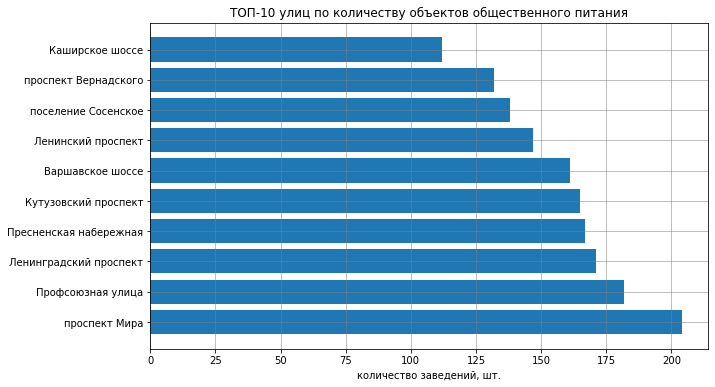

In [18]:
#print(list(rest_data_streets_top_10['streets']))
# Построим график ТОП-10 улиц
x = np.arange(len(rest_data_streets_top_10))
fig, ax = plt.subplots(figsize = (10, 6))
rects = ax.barh(x, rest_data_streets_top_10['count_object'])
ax.set_title('ТОП-10 улиц по количеству объектов общественного питания')
ax.set_xlabel('количество заведений, шт.')
ax.set_yticks(x)
ax.set_yticklabels(rest_data_streets_top_10['streets'])
plt.grid(color = 'gray', linestyle = '-', linewidth = 0.5) # включить отрисовку сетки c определенными параметрами
plt.savefig('6 ТОП-10 улиц по количеству объектов общественного питания.png')
plt.show()

ТОП-10 улиц с максимальным количеством объектов общественного питания: 'проспект Мира', 'Профсоюзная улица', 'Ленинградский проспект', 'Пресненская набережная', 'Кутузовский проспект', 'Варшавское шоссе', 'Ленинский проспект', 'поселение Сосенское', 'проспект Вернадского', 'Каширское шоссе'. В таблице выше перечисленны районы и административные округа, в которых расположены упомянутые улицы.

### Улицы с единственным объектом общественного питания 

[В начало](#intro)

Найдем число улиц с одним объектом общественного питания и, воспользовавшись внешней информацией, определим, в каких районах Москвы находятся эти улицы.

In [19]:
# Найдем улицы с одним заведением
var_count = 1
rest_data_streets_one = rest_data_streets.query("count_object == @var_count")
print('Первые 5 строк таблицы улиц с единственным объектом общественного питания \nс указанием районов (district) и административных округов (adm_area):')
display(rest_data_streets_one.head())
print('Общее количество улиц с одним заведением:', rest_data_streets_one.shape[0])
#print(list(rest_data_streets_one['streets']))

Первые 5 строк таблицы улиц с единственным объектом общественного питания 
с указанием районов (district) и административных округов (adm_area):


,streets,count_object,district,adm_area
1321,улица Демьяна Бедного,1,[район Хорошёво-Мнёвники],[Северо-Западный административный округ]
1322,Андреево-Забелинская улица,1,[район Богородское],[Восточный административный округ]
1323,1-й Саратовский проезд,1,[nan],[nan]
1324,Андроньевская площадь,1,[nan],[nan]
1325,2-й Стрелецкий проезд,1,[nan],[nan]


Общее количество улиц с одним заведением: 579


Общее количество улиц с одним заведением: 579. В таблице выше перечисленны районы и административные округа, в которых расположены упомянутые улицы.

In [20]:
rest_data_streets_one.explode('district')['district'].value_counts()

Таганский район           19
Басманный район           16
Тверской район            15
район Хамовники           15
район Сокольники          10
                          ..
район Некрасовка           1
поселение Московский       1
район Филёвский Парк       1
район Чертаново Южное      1
поселение "Мосрентген"     1
Name: district, Length: 92, dtype: int64

## Общий вывод
[В начало](#intro)

В ходе исследования было установлено, что:<br>
1) Исходный датафрейм представляет собой таблицу из 15365 записей об объектах общественного питания г. Москвы. В столбцах используются значения различных типов: строки и целые числа. Автоматически определенный тип значений верен. Пропусков в датафрейме не обнаружено. Количество дубликатов в датафрейме без учета столбца id: 85 шт. Удалив дубликаты оставляем 99 % от исходного количества строк (15281 шт.).<br>
2) **Почти 40 % всех заведений - это кафе**. На втором месте по распространенности столовые (16,8 %), далее следуют рестораны (14,9 %) и предприятия быстрого обслуживания (12,5 %). Прочие 5 видов заведений вместе набирают чуть более 16 % (среди них больше всего баров - более 5 %).<br>
3) Почти **81 % всех заведений - не сетевые**. Чуть более 19 % - сетевые.<br> 
4) **В абсолютных величинах сетевых объектов общественного питания больше всего среди кафе (1396 шт.), а в относительных величинах - среди предприятий быстрого обслуживания (40,98 %)**. Среди столовых и буфетов сетевых предприятий почти нет.<br>
5) Для объектов общественного питания сетевых предприятий **характерно наличие лишь нескольких сетей** с большым количеством заведений как с небольшим (до 26), так и со средним (от 26 до 68) и большим (от 68) числом посадочных мест в каждом.<br>
6) **ТОП-5 видов заведений, которые предоставляют в среднем самое большое количество посадочных мест**: столовые, рестораны, бары, кафе и предприятия быстрого обслуживания (112, 100, 53, 47 и 40 посадочных мест соответственно).<br>
7) **ТОП-10 улиц с максимальным количеством объектов общественного питания**: 'проспект Мира', 'Профсоюзная улица', 'Ленинградский проспект', 'Пресненская набережная', 'Кутузовский проспект', 'Варшавское шоссе', 'Ленинский проспект', 'поселение Сосенское', 'проспект Вернадского', 'Каширское шоссе'.<br>
8) Общее **количество улиц с одним заведением: 579**.
<br>
<br>
<br>
**РЕКОМЕНДАЦИИ ПО ИТОГАМ ИССЛЕДОВАНИЯ**<br>
Конкурировать с уже существующими заведениями общественного питания создаваемое предприятие может за счет необычности самой идеи обслуживания клиентов роботами.<br>
На основании проведенного анализа возможно дать следующие рекомендации для обеспечения устойчивого клиентского спроса:<br> 
1) **вид**: кафе (максимум заведений имеют аналогичный формат),<br>
2) **количество посадочных мест**: в пределах 50 (среднее количество посадочных мест для кафе - 47), <br>
3) **улица / район / округ расположения**: 'проспект Мира', 'Профсоюзная улица', 'Ленинградский проспект' / Мещанский район, Останкинский район, Алексеевский район, район Ростокино, район Свиблово, район Черёмушки, район Тёплый Стан, район Коньково, Обручевский район, район Ясенево, район Беговой, район Аэропорт, район Сокол, Хорошёвский район / Центральный административный округ, Северо-Восточный административный округ, Юго-Западный административный округ, Северный административный округ (ТОП-3 улицы с наибольшим количеством заведений, и, следовательно, потенциальных клиентов).<br>
4) **имеет смысл далее развивать предприятия, сделав его сетевым**. Это позволит увеличить количество потенциальных клиентов и оптимизировать операционные затраты за счет эффекта масштаба.


Ссылка на презентацию в формате PDF: <https://disk.yandex.ru/i/C1jezO5YT2JPLA> 